<p> Importe de librerias </p>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

<p> Importe de datos </p>

In [45]:
#import data .txt file and read it into a numpy array

def read_data(filename):
    data = np.loadtxt('../data/'+filename+'.txt', delimiter=' ')
    return data

#Data files belong to cold dark matter halo simulations of Milky Way particles interacting with the Large Magellanic Cloud (LMC)
#mw prefix is for MW particles in the non interacting regime
#lmc prefix is for MW particles in perturbed dark matter halo

data_mw = read_data('rand_mwb1_110_E')
data_lmc = read_data('rand_mwlmcb1_110')


# # data_mw = np.loadtxt('../data/rand_mwb1_110_E.txt', delimiter=' ')
# # print(data.shape)

# data_lmc = np.loadtxt('../data/rand_mwlmcb1_110.txt', delimiter=' ')


pot_mw = data_mw[:,6]
pot_mw_lm = data_lmc[:,6]
# print(pot_mw)
v_mw = data_mw[:,3:6]
v_mw_lmc = data_lmc[:,3:6]


v_components=np.zeros((v_mw.shape[0],3))


def calculate_v_mag_square(v_mw):
    v_mag = np.sqrt(v_mw[:,0]**2+v_mw[:,1]**2+v_mw[:,2]**2)
    return v_mag

v_mag_square_mw = calculate_v_mag_square(v_mw)
v_mag_square_mw_lmc = calculate_v_mag_square(v_mw_lmc)



E_mw = pot_mw+v_mag_square_mw
E_mw_lmc = pot_mw_lm+v_mag_square_mw_lmc


In [46]:
#Positions and velocities of Milky Way galaxy dark matter halo particles



pos_mw = data_mw[:,0:3]
pos_mw_lmc = data_lmc[:,0:3]


vel_mw = data_mw[:,3:6]
vel_mw_lmc = data_lmc[:,3:6]



#Calculate angular momentum components

def angular_momentum(pos, vel):
    """Calculate angular momentum components of particles given position an velocity arrays.

    Args:
        pos (_array_): _Position 3 dim_
        vel (_array_): _Velocities 3 dim_

    Returns:
        _1d array_: Angular momenta in each direction and total mag__
    """
    L = np.cross(pos, vel)
    mag = np.linalg.norm(L, axis=1)
    return L[:,0], L[:,1], L[:,2], mag

Lx1, Ly1, Lz1, L_mag_mw = angular_momentum(pos_mw, vel_mw)
Lx2, Ly2, Lz2, L_mag_mw_lmc = angular_momentum(pos_mw_lmc, vel_mw_lmc)

In [82]:
# print("shape of L, E", L_mag_mw.shape, E.shape)
# print("instance of L, E", L_mag_mw[1], E[0])


#Plots of Energy function of angular momentum for non perturbed halo


# fig1, ax1 = plt.subplots(1, 1)
# ax1.plot(Lx1, E_mw, '.',markersize=0.1, color='palevioletred')
# ax1.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
# ax1.set_xlabel(r'L [$kpc \, km \, s^{-1}$]')
# ax1.set_ylabel(r'E [$kpc \, km^2 \, s^{-2}$]')
# ax1.title.set_text('Energy vs Angular Momentum in x')
# plt.savefig('./../media/imgs/energy_ang_momenta/E_vs_Lx.jpg')



# fig2, ax2 = plt.subplots(1, 1)
# ax2.plot(Ly1, E_mw, '.',markersize=0.1, color = 'darkslateblue')
# ax2.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
# ax2.set_xlabel(r'L [$kpc \, km \, s^{-1}$]')
# ax2.set_ylabel(r'E [$kpc \, km^2 \, s^{-2}$]')
# ax2.title.set_text('Energy vs Angular Momentum in y')
# plt.savefig('./../media/imgs/energy_ang_momenta/E_vs_Ly.jpg')




# fig3, ax3 = plt.subplots(1, 1)
# ax3.plot(Lz1, E_mw, '.',markersize=0.1, color='sandybrown')
# ax3.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
# ax3.set_xlabel(r'L [$kpc \, km \, s^{-1}$]')
# ax3.set_ylabel(r'E [$kpc \, km^2 \, s^{-2}$]')
# ax3.title.set_text('Energy vs Angular Momentum in z')
# plt.savefig('./../media/imgs/energy_ang_momenta/E_vs_Lz.jpg')

#Function to plot energy vs angular momentum 
def hist_energy_ang_momenta(L, E,  filename, xlabel, ylabel):
    """This function plots energy vs angular momentum for a given L and E array and makes histogram of density.

    Args:
        L (ndarray): 1d ang momenta numpy array
        E (ndarray): 1d energy numpy array
        filename (string): filename to save plot
        xlabel (string): Momentum axis label
        ylabel (string): Energy axis label
    """
    fig, ax = plt.subplots(1, 1)
    energy = np.histogram2d(L, E, bins=350)
    im = ax.imshow(np.log10(energy[0].T), cmap='viridis', vmin=0, vmax=2.5, origin='lower')
    # ax.hist(L, bins=100, color='darkslateblue', alpha=0.5)
    ax.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
    ax.set_xlabel(r'L [$kpc \, km \, s^{-1}$]')
    ax.set_ylabel(r'Counts')
    ax.title.set_text('2D Histogram of '+ ylabel + ' vs ' + xlabel)
    plt.colorbar(im, ax=ax)
    plt.savefig('./../media/imgs/hist/E_vs_L/'+filename+'.jpg')
    plt.close(fig)
    plt.show()
    plt.close()

hist_energy_ang_momenta(Lx1, E_mw, 'E_vs_Lx', 'Lx', 'E')
hist_energy_ang_momenta(Ly1, E_mw, 'E_vs_Ly', 'Ly', 'E')
hist_energy_ang_momenta(Lz1, E_mw, 'E_vs_Lz', 'Lz', 'E')
hist_energy_ang_momenta(Lx2, E_mw_lmc, 'E_vs_Lx_lmc', 'Lx', 'E')
hist_energy_ang_momenta(Ly2, E_mw_lmc, 'E_vs_Ly_lmc', 'Ly', 'E')
hist_energy_ang_momenta(Lz2, E_mw_lmc, 'E_vs_Lz_lmc', 'Lz', 'E')





# fig4, ax4 = plt.subplots(1, 1)
# energy_mw_lx = np.histogram2d(Lx1, E_mw, bins=250)
# im_4 = ax4.imshow(np.log10(energy_lx[0].T), cmap='viridis', vmin = 0, vmax = 500, origin='lower')
# ax4.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
# ax4.title.set_text('Histogram E vs L in x')
# plt.colorbar(im_4, ax=ax4)
# plt.savefig('./../media/imgs/energy_ang_momenta/hist_E_Lx.jpg')


# fig5, ax5 = plt.subplots(1, 1)
# energy_mw_ly = np.histogram2d(Ly1, E_mw, bins=250)
# im_5 = ax5.imshow(np.log10(energy_ly[0].T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower', )
# ax5.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
# ax5.title.set_text('Histogram E vs L in y')
# plt.colorbar(im_5, ax=ax5)
# plt.savefig('./../media/imgs/energy_ang_momenta/hist_E_Ly.jpg')


# fig6, ax6 = plt.subplots(1, 1)
# energy_mw_lz = np.histogram2d(Lz1, E_mw, bins=250)
# im_6 = ax6.imshow(np.log10(energy_lz[0].T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower', )
# ax6.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
# ax6.title.set_text('Histogram E vs L in z')
# plt.colorbar(im_6, ax=ax6)
# plt.savefig('./../media/imgs/energy_ang_momenta/z.jpg')

# fig, ax = plt.subplots(1, 1)
# energy_mw_lmag = np.histogram2d(L_mag_mw, E_mw, bins=250)
# im = ax.imshow(np.log10(energy_lmag[0].T), cmap='viridis', origin='lower', vmin = 0, vmax = 5000, )
# ax.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
# ax.set_xlabel(r'L [$kpc \, km \, s^{-1}$]')
# ax.title.set_text('Histogram E vs L magnitude')
# ax.set_ylabel(r'E [$kpc \, km^2 \, s^{-2}$]')
# plt.colorbar(im, ax=ax)
# plt.savefig('./../media/imgs/energy_ang_momenta/hist_E_Lmag.jpg')


# plt.show()
# plt.close()



C:\Users\Stephanie\AppData\Local\Temp\ipykernel_14992\594634258.py:50: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(energy[0].T), cmap='viridis', vmin=0, vmax=2.5, origin='lower')


C:\Users\Stephanie\AppData\Local\Temp\ipykernel_14992\1735596868.py:35: RuntimeWarning: divide by zero encountered in log
  im_4 = ax4.imshow(np.log(energy_lmc_lx[0].T), cmap='viridis', vmin = 0, vmax = 0.5, origin='lower')
C:\Users\Stephanie\AppData\Local\Temp\ipykernel_14992\1735596868.py:44: RuntimeWarning: divide by zero encountered in log10
  im_5 = ax5.imshow(np.log10(energy_lmc_ly[0].T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower')
C:\Users\Stephanie\AppData\Local\Temp\ipykernel_14992\1735596868.py:53: RuntimeWarning: divide by zero encountered in log10
  im_6 = ax6.imshow(np.log10(energy_lmc_lz[0].T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower')
C:\Users\Stephanie\AppData\Local\Temp\ipykernel_14992\1735596868.py:61: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(energy_lmc_lmag[0].T), cmap='viridis', origin='lower', vmin = 0, vmax = 5000)


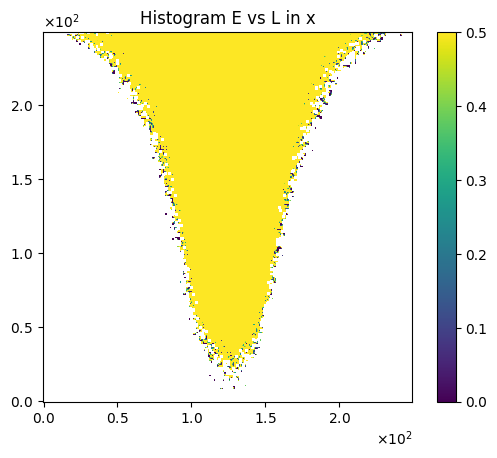

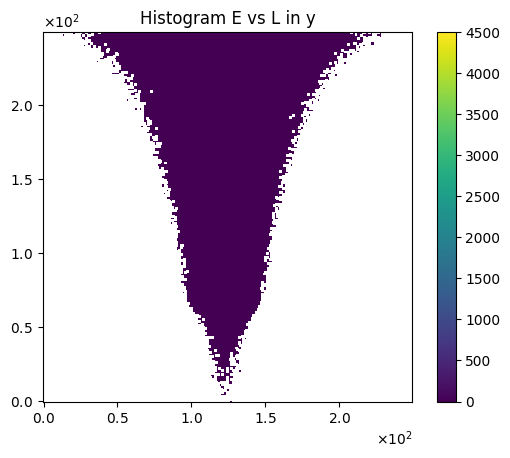

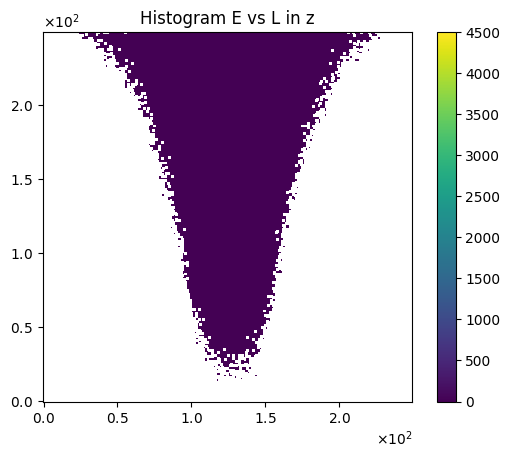

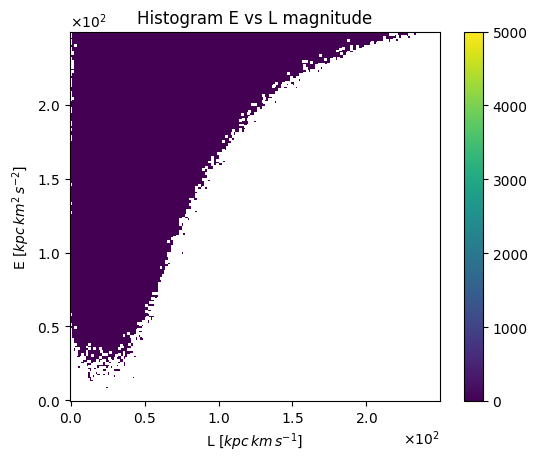

In [55]:
# fig1, ax1 = plt.subplots(1, 1)
# ax1.plot(Lx2, E_mw_lmc, '.',markersize=0.1, color='palevioletred')
# ax1.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
# ax1.set_xlabel(r'L [$kpc \, km \, s^{-1}$]')
# ax1.set_ylabel(r'E [$kpc \, km^2 \, s^{-2}$]')
# ax1.title.set_text('Energy vs Angular Momentum in x')
# plt.savefig('./../media/imgs/energy_ang_momenta/E_vs_Lx.jpg')



# fig2, ax2 = plt.subplots(1, 1)
# ax2.plot(Ly2, E_mw_lmc, '.',markersize=0.1, color = 'darkslateblue')
# ax2.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
# ax2.set_xlabel(r'L [$kpc \, km \, s^{-1}$]')
# ax2.set_ylabel(r'E [$kpc \, km^2 \, s^{-2}$]')
# ax2.title.set_text('Energy vs Angular Momentum in y')
# plt.savefig('./../media/imgs/energy_ang_momenta/E_vs_Ly.jpg')




# fig3, ax3 = plt.subplots(1, 1)
# ax3.plot(Lz2, E_mw_lmc, '.',markersize=0.1, color='sandybrown')
# ax3.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
# ax3.set_xlabel(r'L [$kpc \, km \, s^{-1}$]')
# ax3.set_ylabel(r'E [$kpc \, km^2 \, s^{-2}$]')
# ax3.title.set_text('Energy vs Angular Momentum in z')
# plt.savefig('./../media/imgs/energy_ang_momenta/E_vs_Lz.jpg')




fig4, ax4 = plt.subplots(1, 1)
energy_lmc_lx = np.histogram2d(Lx2, E_mw_lmc, bins=250)
im_4 = ax4.imshow(np.log(energy_lmc_lx[0].T), cmap='viridis', vmin = 0, vmax = 0.5, origin='lower')
ax4.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
ax4.title.set_text('Histogram E vs L in x')
plt.colorbar(im_4, ax=ax4)
plt.savefig('./../media/imgs/energy_ang_momenta/hist_E_Lx.jpg')


fig5, ax5 = plt.subplots(1, 1)
energy_lmc_ly = np.histogram2d(Ly2, E_mw_lmc, bins=250)
im_5 = ax5.imshow(np.log10(energy_lmc_ly[0].T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower')
ax5.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
ax5.title.set_text('Histogram E vs L in y')
plt.colorbar(im_5, ax=ax5)
plt.savefig('./../media/imgs/energy_ang_momenta/hist_E_Ly.jpg')


fig6, ax6 = plt.subplots(1, 1)
energy_lmc_lz = np.histogram2d(Lz2, E_mw_lmc, bins=250)
im_6 = ax6.imshow(np.log10(energy_lmc_lz[0].T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower')
ax6.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
ax6.title.set_text('Histogram E vs L in z')
plt.colorbar(im_6, ax=ax6)
plt.savefig('./../media/imgs/energy_ang_momenta/z.jpg')

fig, ax = plt.subplots(1, 1)
energy_lmc_lmag = np.histogram2d(L_mag_mw_lmc, E_mw_lmc, bins=250)
im = ax.imshow(np.log10(energy_lmc_lmag[0].T), cmap='viridis', origin='lower', vmin = 0, vmax = 5000)
ax.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
ax.set_xlabel(r'L [$kpc \, km \, s^{-1}$]')
ax.title.set_text('Histogram E vs L magnitude')
ax.set_ylabel(r'E [$kpc \, km^2 \, s^{-2}$]')
plt.colorbar(im, ax=ax)
plt.savefig('./../media/imgs/energy_ang_momenta/hist_E_Lmag.jpg')


plt.show()
plt.close()

Histograma restando la energia del halo no perturbado

C:\Users\Stephanie\AppData\Local\Temp\ipykernel_14992\4217018939.py:11: RuntimeWarning: divide by zero encountered in log
  im_8 = ax8.imshow(np.log(energy_x.T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower')
C:\Users\Stephanie\AppData\Local\Temp\ipykernel_14992\4217018939.py:11: RuntimeWarning: invalid value encountered in log
  im_8 = ax8.imshow(np.log(energy_x.T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower')
C:\Users\Stephanie\AppData\Local\Temp\ipykernel_14992\4217018939.py:20: RuntimeWarning: divide by zero encountered in log10
  im_9 = ax9.imshow(np.log10(energy_y.T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower')
C:\Users\Stephanie\AppData\Local\Temp\ipykernel_14992\4217018939.py:20: RuntimeWarning: invalid value encountered in log10
  im_9 = ax9.imshow(np.log10(energy_y.T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower')
C:\Users\Stephanie\AppData\Local\Temp\ipykernel_14992\4217018939.py:29: RuntimeWarning: divide by zero encountered in log10
  

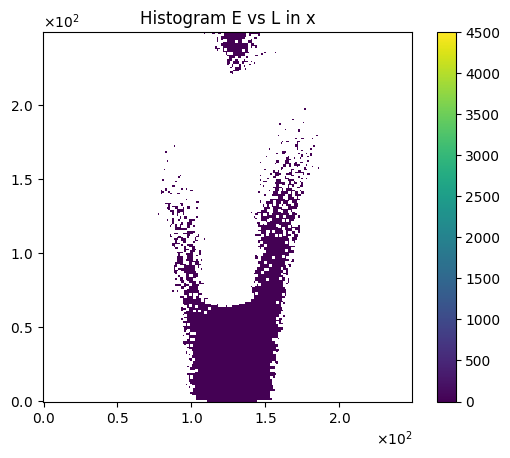

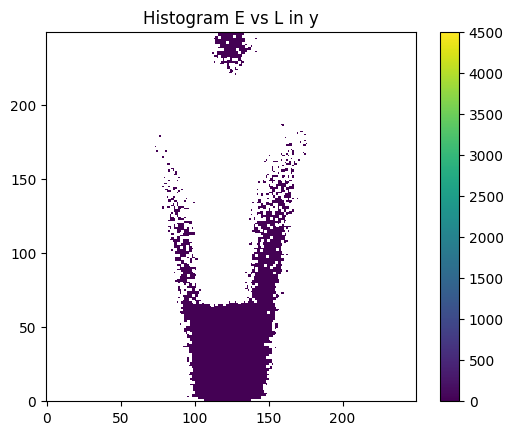

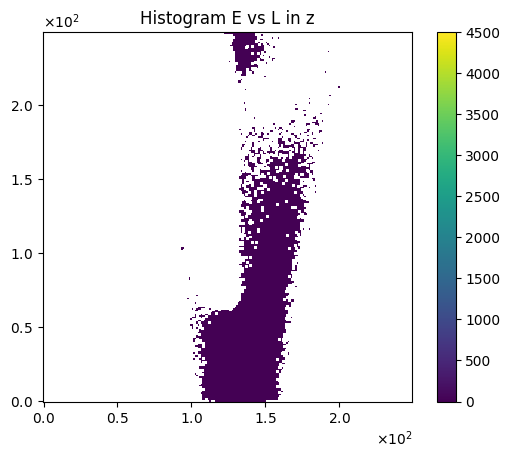

In [53]:
# energy_division = (E_mw_lmc/E_mw) - 1
energy_x = (energy_mw_lx[0] - energy_lmc_lx[0]) - 1
energy_y = (energy_mw_ly[0] - energy_lmc_ly[0]) - 1
energy_z = (energy_mw_lz[0] - energy_lmc_lz[0]) - 1

hist_energy_ang_momenta(energy_x, )





fig8, ax8 = plt.subplots(1, 1)
# energy_lx = np.histogram2d(Lx2, E_mw_lmc, bins=250)
im_8 = ax8.imshow(np.log(energy_x.T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower')
ax8.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
ax8.title.set_text('Histogram E vs L in x')
plt.colorbar(im_8, ax=ax8)
plt.savefig('./../media/imgs/energy_ang_momenta/hist_E_Lx.jpg')


fig9, ax9 = plt.subplots(1, 1)
energy_ly = np.histogram2d(Ly2, E_mw_lmc, bins=250)
im_9 = ax9.imshow(np.log10(energy_y.T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower')
ax5.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
ax9.title.set_text('Histogram E vs L in y')
plt.colorbar(im_9, ax=ax9)
plt.savefig('./../media/imgs/energy_ang_momenta/hist_E_Ly.jpg')


fig10, ax10 = plt.subplots(1, 1)
energy_lz = np.histogram2d(Lz2, E_mw_lmc, bins=250)
im_10 = ax10.imshow(np.log10(energy_z.T), cmap='viridis', vmin = 0, vmax = 4500, origin='lower')
ax10.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
ax10.title.set_text('Histogram E vs L in z')
plt.colorbar(im_10, ax=ax10)
plt.savefig('./../media/imgs/energy_ang_momenta/z.jpg')

# fig11, ax11 = plt.subplots(1, 1)
# energy_lmag = np.histogram2d(L_mag_mw_lmc, E_mw_lmc, bins=250)
# im = ax11.imshow(np.log10(energy_lmag[0].T), cmap='viridis', origin='lower', vmin = 0, vmax = 5000)
# ax11.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
# ax11.set_xlabel(r'L [$kpc \, km \, s^{-1}$]')
# ax11.title.set_text('Histogram E vs L magnitude')
# ax11.set_ylabel(r'E [$kpc \, km^2 \, s^{-2}$]')
# plt.colorbar(im, ax=ax11)
# plt.savefig('./../media/imgs/energy_ang_momenta/hist_E_Lmag.jpg')


plt.show()
plt.close()